#Download Libraries

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string


def preprocess_text(text):
    # Removing irrelevant information
    # (Replace this with your own logic for removing irrelevant information)
    processed_text = text

    # Removing special characters and punctuation
    processed_text = processed_text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(processed_text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Joining tokens back into a sentence
    processed_text = ' '.join(tokens)

    return processed_text



#Training Data

In [ ]:
# TRAIN_DATA = [
#     ("I deleted it from the phone but I could not find a better app than this so I downloaded it only", "Improve app search functionality"),
#     ("Who will pay for this app just for personal nutrition. Ask chatgpt they are suggesting the verity of options. There guys does not having anything.", "Enhance app value proposition"),
#     ("I hope", "No specific improvement suggestion")]



In [ ]:
# import pandas as pd


# # Convert the list of tuples to a DataFrame
# df = pd.DataFrame(TRAIN_DATA, columns=['Review_Text', 'Improvement_Suggestion'])

# # Save the DataFrame to a CSV file
# df.to_csv('train_data.csv', index=False)


Training data

In [ ]:
import pandas as pd

# Function to process the uploaded CSV file
def process_csv(file_path):
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Perform any desired operations on the data
        # For example, print the first few rows of the DataFrame
        print(df.head())

        # You can also perform other operations on the data

    except Exception as e:
        print("Error: ", str(e))

# Ask the user to upload a file
file_path = input("Upload a training CSV file and copy file path here: ")

# Store the file path in a variable
training_csv_path = file_path


Upload a training CSV file and copy file path here: /content/train_data.csv


Take Input


In [ ]:
import pandas as pd

# Function to process the uploaded CSV file
def process_csv(file_path):
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Perform any desired operations on the data
        # For example, print the first few rows of the DataFrame
        print(df.head())

        # You can also perform other operations on the data

    except Exception as e:
        print("Error: ", str(e))

# Ask the user to upload a file
file_path = input("Upload a CSV file and copy file path here: ")

# Store the file path in a variable
csv_path = file_path


Upload a CSV file and copy file path here: /content/Flipkart Test Data.csv


#Below Is SIA Approach

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the CSV file containing the reviews
df = pd.read_csv(csv_path,encoding='latin1')

#preprocess data
df['test_Processed_Text'] = df['review_text'].apply(preprocess_text)

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each review
sentiments = []
for review in df['test_Processed_Text']:
    sentiment_score = sia.polarity_scores(review)
    # Classify as negative if the compound score is less than 0, otherwise positive
    sentiment = 0 if sentiment_score['compound'] < 0 else 1
    sentiments.append(sentiment)

# Add the sentiments to the dataframe
df['Sentiment'] = sentiments

# Filter negative reviews
negative_reviews = df[df['Sentiment'] == 0]['review_text']

# # Save the dataframe to a new CSV file
# df.to_csv('reviews_with_sentiments.csv', index=False)
df.to_csv('test_reviews_with_sentiments.csv', index=False)


#Training to give Improvement Suggestion

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Load the CSV file containing the training reviews
train_df = pd.read_csv(training_csv_path,encoding='latin1')

# Prepare the training data
X_train = train_df['Review_Text'].tolist()
y_train = train_df['Improvement_Suggestion'].tolist()


# Load the CSV file containing the test reviews
test_csv_path = '/content/test_reviews_with_sentiments.csv'
df = pd.read_csv(test_csv_path)

# Extract the test reviews
test_reviews = df['review_text']

# Create a TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)

# Train a LinearSVC classifier
classifier = LinearSVC()
classifier.fit(X_train_vectors, y_train)

# Convert the test reviews into numerical features using the same vectorizer
test_vectors = vectorizer.transform(test_reviews)

# Make predictions
predictions = classifier.predict(test_vectors)

# Add the predictions to the DataFrame
df['Improvement_Suggestion'] = predictions

# Save the DataFrame to a new CSV file
df.to_csv('test_reviews_with_suggestions.csv', index=False)


#other algorithms

#Random Forest

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the CSV file containing the test reviews
train_df = pd.read_csv(training_csv_path,encoding='latin1')

# Prepare the training data
X_train = train_df['Review_Text'].tolist()
y_train = train_df['Improvement_Suggestion'].tolist()

# Extract the test reviews
test_reviews = df['review_text']

# Create a TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)

# Train a Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train_vectors, y_train)

# Convert the test reviews into numerical features using the same vectorizer
test_vectors = vectorizer.transform(test_reviews)

# Make predictions
predictions = classifier.predict(test_vectors)

# Add the predictions to the DataFrame
df['Improvement_Suggestion'] = predictions

# Save the DataFrame to a new CSV file
df.to_csv('test_reviews_with_suggestions_rf.csv', index=False)



#Decision Tree

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the CSV file containing the test reviews
train_df = pd.read_csv(training_csv_path,encoding='latin1')

# Prepare the training data
X_train = train_df['Review_Text'].tolist()
y_train = train_df['Improvement_Suggestion'].tolist()

# Extract the test reviews
test_reviews = df['review_text']

# Create a TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)

# Train a Decision Tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_vectors, y_train)

# Convert the test reviews into numerical features using the same vectorizer
test_vectors = vectorizer.transform(test_reviews)

# Make predictions
predictions = classifier.predict(test_vectors)

# Add the predictions to the DataFrame
df['Improvement_Suggestion'] = predictions

# Save the DataFrame to a new CSV file
df.to_csv('test_reviews_with_suggestions_dt.csv', index=False)


In [ ]:
pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from hmmlearn import hmm

# Load the CSV file containing the test reviews
train_df = pd.read_csv(training_csv_path,encoding='latin1')

# Prepare the training data
X_train = train_df['Review_Text'].tolist()
y_train = train_df['Improvement_Suggestion'].tolist()

# Extract the test reviews
test_reviews = df['review_text']

# Create a TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)

# Train an HMM classifier
classifier = hmm.GaussianHMM(n_components=2)  # Adjust the parameters as needed
classifier.fit(X_train_vectors.toarray())

# Convert the test reviews into numerical features using the same vectorizer
test_vectors = vectorizer.transform(test_reviews)

# Make predictions
predictions = classifier.predict(test_vectors.toarray())

# Add the predictions to the DataFrame
df['Improvement_Suggestion'] = predictions

# Save the DataFrame to a new CSV file
df.to_csv('test_reviews_with_suggestions.csv', index=False)


#**Naive bayes**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the CSV file containing the test reviews
train_df = pd.read_csv(training_csv_path,encoding='latin1')

# Prepare the training data
X_train = train_df['Review_Text'].tolist()
y_train = train_df['Improvement_Suggestion'].tolist()

# Extract the test reviews
test_reviews = df['review_text']

# Create a TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectors, y_train)

# Convert the test reviews into numerical features using the same vectorizer
test_vectors = vectorizer.transform(test_reviews)

# Make predictions
predictions = classifier.predict(test_vectors)

# Add the predictions to the DataFrame
df['Improvement_Suggestion'] = predictions

# Save the DataFrame to a new CSV file
df.to_csv('test_reviews_with_suggestions.csv', index=False)



#logistic regression

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load the CSV file containing the test reviews
train_df = pd.read_csv(training_csv_path,encoding='latin1')

# Prepare the training data
X_train = train_df['Review_Text'].tolist()
y_train = train_df['Improvement_Suggestion'].tolist()

# Extract the test reviews
test_reviews = df['review_text']

# Create a TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)

# Train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train_vectors, y_train)

# Convert the test reviews into numerical features using the same vectorizer
test_vectors = vectorizer.transform(test_reviews)

# Make predictions
predictions = classifier.predict(test_vectors)

# Add the predictions to the DataFrame
df['Improvement_Suggestion'] = predictions

# Save the DataFrame to a new CSV file
df.to_csv('test_reviews_with_suggestions.csv', index=False)


#KNN

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

# Load the CSV file containing the test reviews
train_df = pd.read_csv(training_csv_path,encoding='latin1')

# Prepare the training data
X_train = train_df['Review_Text'].tolist()
y_train = train_df['Improvement_Suggestion'].tolist()

# Extract the test reviews
test_reviews = df['review_text']

# Create a TF-IDF vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)

# Train a KNN classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_vectors, y_train)

# Convert the test reviews into numerical features using the same vectorizer
test_vectors = vectorizer.transform(test_reviews)

# Make predictions
predictions = classifier.predict(test_vectors)

# Add the predictions to the DataFrame
df['Improvement_Suggestion'] = predictions

# Save the DataFrame to a new CSV file
df.to_csv('test_reviews_with_suggestions.csv', index=False)


#improvement suggestions graph

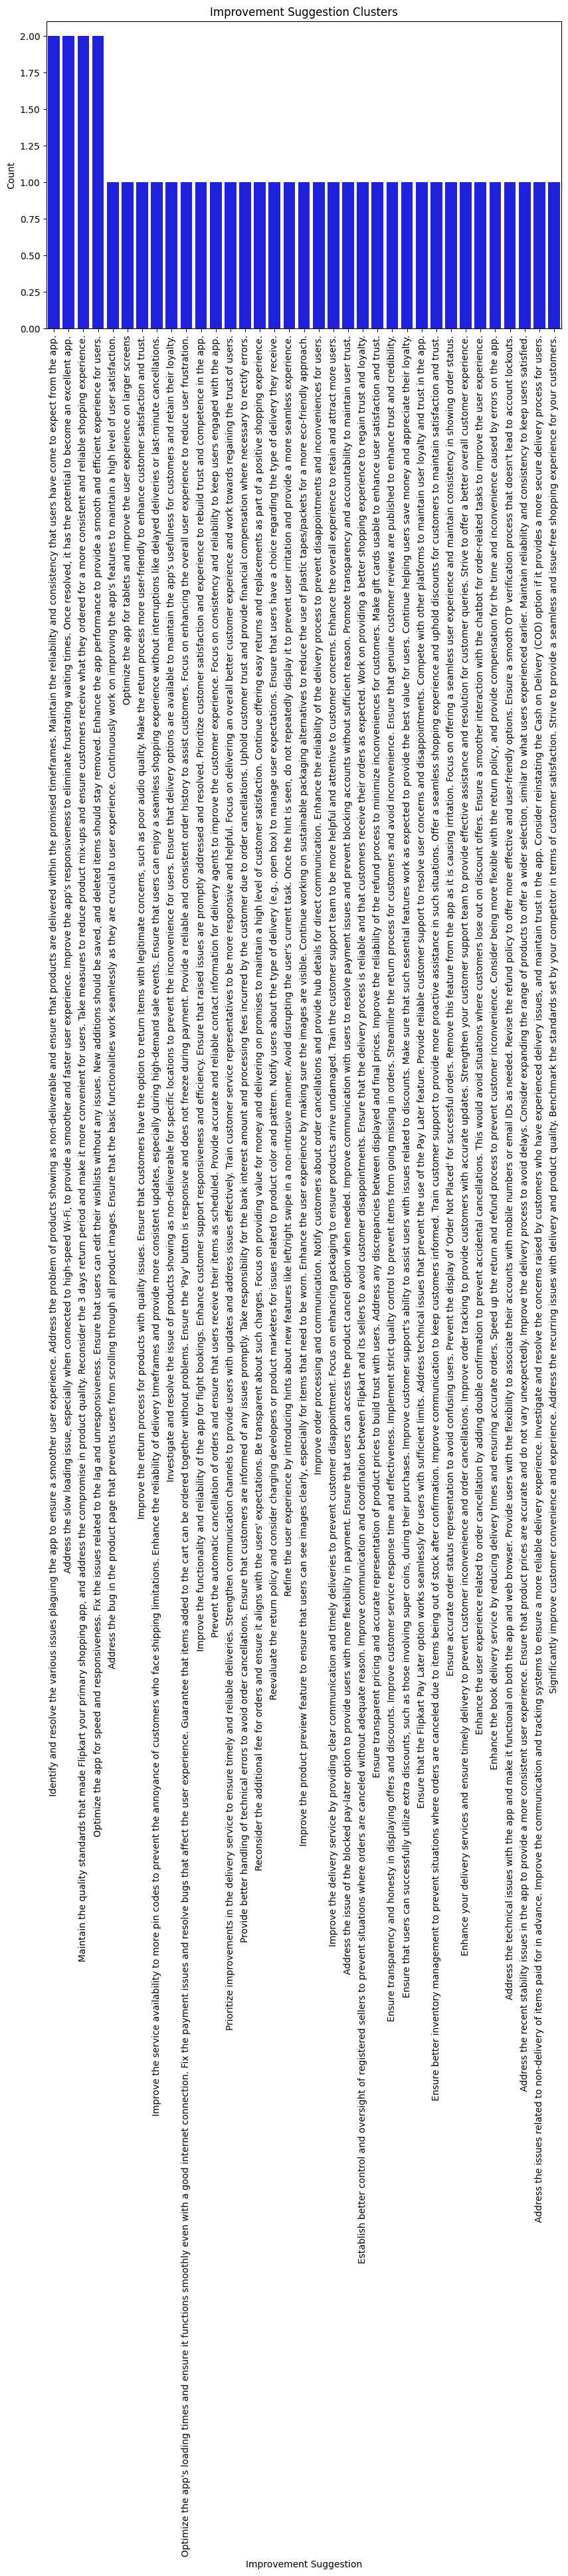

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/content/test_reviews_with_suggestions.csv')

# Group the data by improvement suggestion and count the occurrences
improvement_suggestion_counts = df.groupby('Improvement_Suggestion').size().reset_index(name='Count')

# Sort the counts in descending order
improvement_suggestion_counts = improvement_suggestion_counts.sort_values('Count', ascending=False)

# Assign colors based on levels
colors = ['red' if count > 5 else 'orange' if count > 2 else 'blue' for count in improvement_suggestion_counts['Count']]

# Plotting the bar chart with custom colors using sns.barplot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='Improvement_Suggestion', y='Count', data=improvement_suggestion_counts, palette=colors)

plt.xlabel('Improvement Suggestion')
plt.ylabel('Count')
plt.title('Improvement Suggestion Clusters')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Display the chart
plt.show()


#word **cloud** This can provide an overview of the key themes or topics mentioned by users.

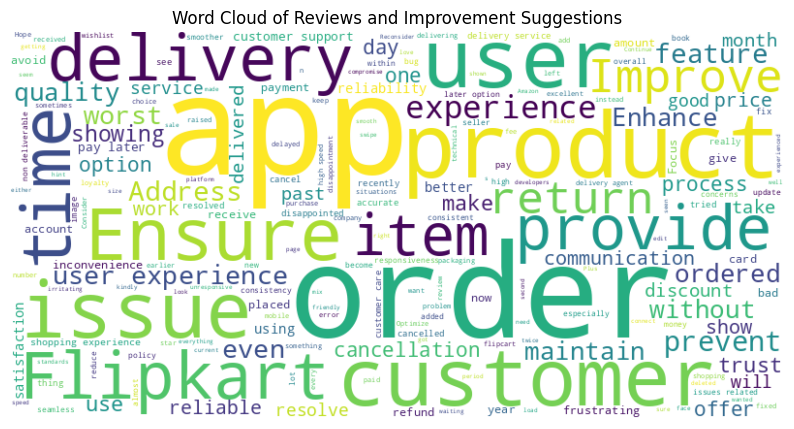

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV file containing the reviews and improvement suggestions
df = pd.read_csv('/content/test_reviews_with_suggestions.csv')

# Concatenate the reviews and improvement suggestions into a single text
text = ' '.join(df['review_text'].astype(str) + ' ' + df['Improvement_Suggestion'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews and Improvement Suggestions')
plt.show()


#histogram

```
# Both the histogram and pie chart will provide a visual representation of the distribution of positive and negative sentiments in the reviews. The histogram displays the counts of each sentiment category, while the pie chart shows the proportion or percentage of each sentiment category.
```



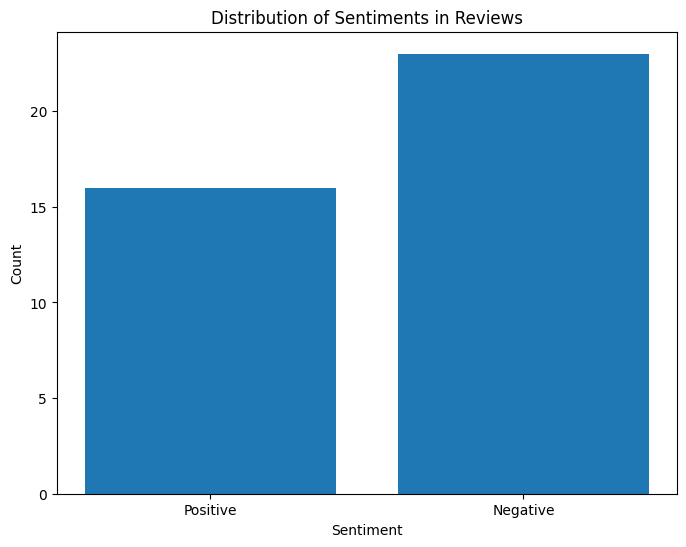

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file containing the sentiment labels
df = pd.read_csv('/content/test_reviews_with_suggestions.csv')

# Count the number of positive and negative sentiments
positive_count = df[df['Sentiment'] == 1].shape[0]
negative_count = df[df['Sentiment'] == 0].shape[0]

# Create a histogram
plt.figure(figsize=(8, 6))
plt.bar(['Positive', 'Negative'], [positive_count, negative_count])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments in Reviews')
plt.show()


#pie chart Both the histogram and pie chart will provide a visual representation of the distribution of positive and negative sentiments in the reviews. The histogram displays the counts of each sentiment category, while the pie chart shows the proportion or percentage of each sentiment category.

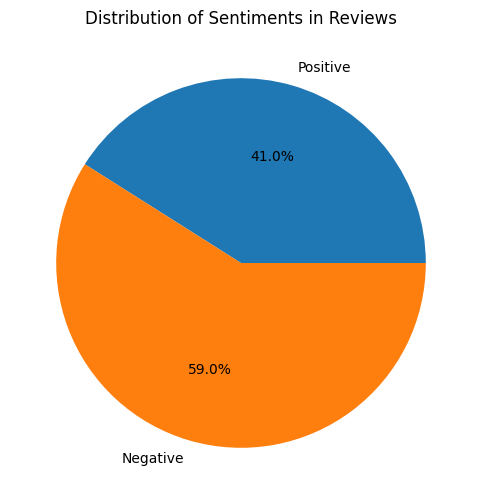

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file containing the sentiment labels
df = pd.read_csv('/content/test_reviews_with_suggestions.csv')

# Count the number of positive and negative sentiments
positive_count = df[df['Sentiment'] == 1].shape[0]
negative_count = df[df['Sentiment'] == 0].shape[0]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie([positive_count, negative_count], labels=['Positive', 'Negative'], autopct='%1.1f%%')
plt.title('Distribution of Sentiments in Reviews')
plt.show()


#Network Analysis: Construct a network graph to visualize the relationships between different improvement suggestions. This can help identify clusters or groups of related suggestions and understand the overall structure of the improvement space.

<ipython-input-15-33602e0aa2dd>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for suggestion_2, co_count in co_occurrences.iteritems():
<ipython-input-15-33602e0aa2dd>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for suggestion_2, co_count in co_occurrences.iteritems():
<ipython-input-15-33602e0aa2dd>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for suggestion_2, co_count in co_occurrences.iteritems():
<ipython-input-15-33602e0aa2dd>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for suggestion_2, co_count in co_occurrences.iteritems():
<ipython-input-15-33602e0aa2dd>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for suggestion_2, co_count in co_occurrences.iteritems():
<ipython-input-15-33

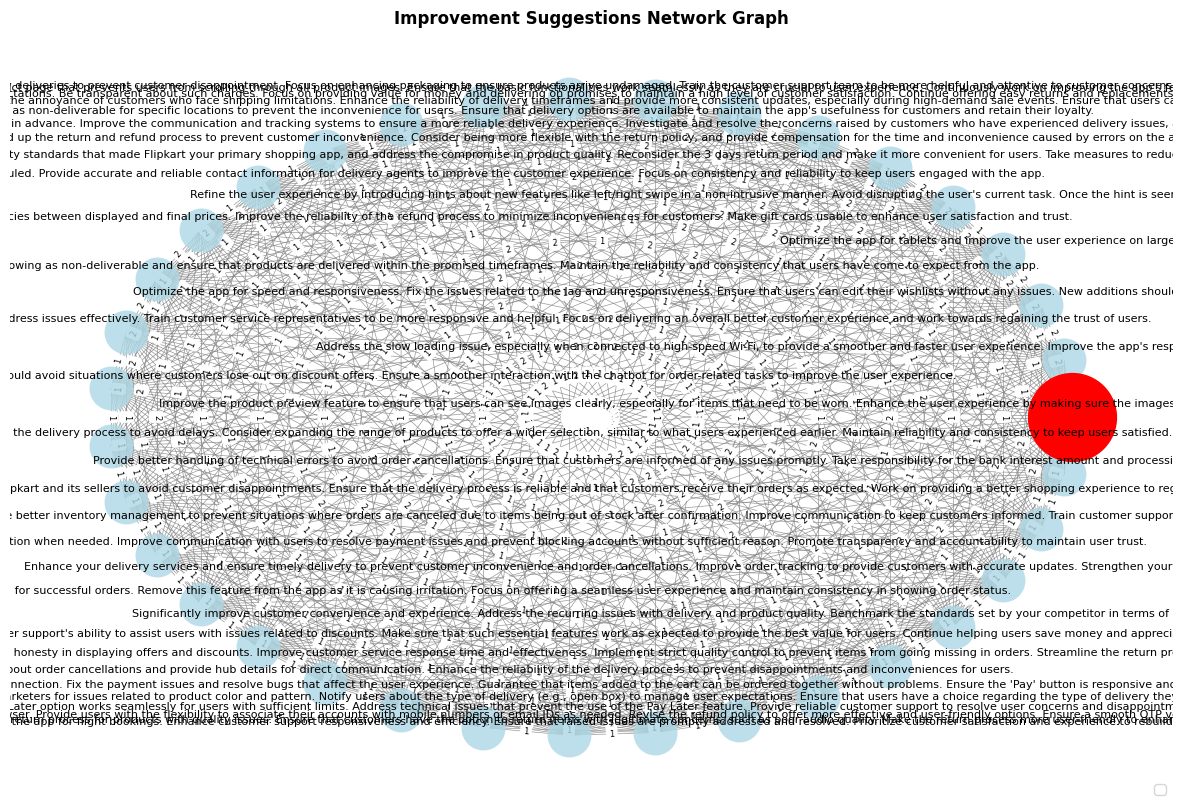

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file containing the improvement suggestions
df = pd.read_csv('/content/test_reviews_with_suggestions.csv')

# Create an empty graph
graph = nx.Graph()

# Add nodes for each unique improvement suggestion
improvement_suggestions = df['Improvement_Suggestion'].unique()
graph.add_nodes_from(improvement_suggestions)

# Compute the co-occurrence count of improvement suggestions
co_occurrence_matrix = df['Improvement_Suggestion'].value_counts().reset_index()

# Add edges between improvement suggestions based on co-occurrence count
for _, row in co_occurrence_matrix.iterrows():
    suggestion_1 = row['index']
    count = row['Improvement_Suggestion']

    # Find other suggestions that co-occur with the current suggestion
    co_occurrences = df[df['Improvement_Suggestion'] != suggestion_1]['Improvement_Suggestion'].value_counts()

    # Add edges between the current suggestion and its co-occurrences
    for suggestion_2, co_count in co_occurrences.iteritems():
        graph.add_edge(suggestion_1, suggestion_2, weight=co_count)

# Set the figure size
plt.figure(figsize=(15, 10))

# Set the layout to a circular layout
pos = nx.circular_layout(graph)

# Increase the distance between the nodes
radius = 1.2
pos = {node: [radius * pos[node][0], radius * pos[node][1]] for node in graph.nodes}

# Draw the network graph with customizations
nx.draw_networkx(graph, pos, with_labels=False, node_size=1000, font_size=8, edge_color='gray', width=0.5,
                 node_color='lightblue', alpha=0.8, linewidths=0)

# Add labels separately to avoid overlapping
label_pos = {node: (pos[node][0], pos[node][1] + 0.05) for node in graph.nodes}
nx.draw_networkx_labels(graph, label_pos, font_size=8)

# Set edge labels to display the co-occurrence count
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=6)

# Find the node with the highest degree centrality
degree_centralities = nx.degree_centrality(graph)
highest_degree_node = max(degree_centralities, key=degree_centralities.get)

# Highlight the node with the highest degree centrality
nx.draw_networkx_nodes(graph, pos, nodelist=[highest_degree_node], node_color='red', node_size=4000)

# Customize the appearance of the graph
plt.title("Improvement Suggestions Network Graph", fontweight='bold', fontsize=12)
plt.axis('off')

# Set the background color
plt.gca().set_facecolor('lightgray')

# Add a legend
plt.legend([highest_degree_node], ['Highest Degree Node'], loc='lower right')

# Save the graph to a file (optional)
plt.savefig('network_graph.png', dpi=300)

# Display the graph
plt.show()
